In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline

In [2]:
path = 'D:/ML/1. Pandas/Data for Pandas Excersises from Git/train.csv'
data = pd.read_csv(path)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
del data['PassengerId']
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


### Distributions

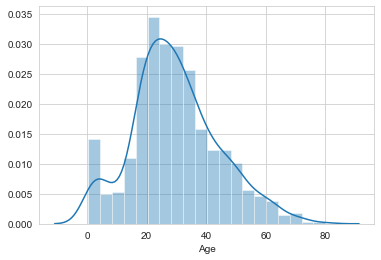

In [27]:
# Before filling NaN
sns.distplot(data[data.Age.notnull()]['Age']);

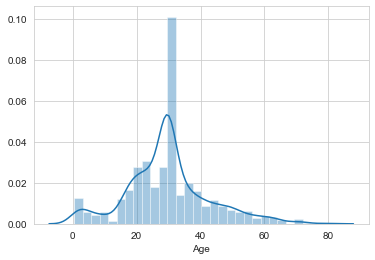

In [30]:
# After Filling NaN
data['Age'] = data['Age'].fillna(data['Age'].mean())
sns.distplot(data['Age']);

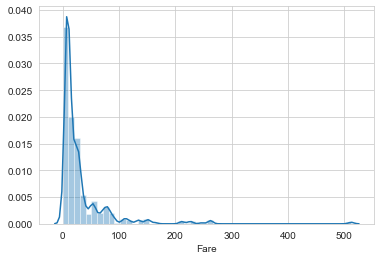

In [31]:
sns.distplot(data['Fare']);

In [33]:
data['Fare'].median()

14.4542

In [41]:
print(data[data['Fare']<=100]['Fare'].count())
print( data[(data['Fare']>100) & (data['Fare']<=200)]['Fare'].count())
print( data[(data['Fare']>200) & (data['Fare']<=300)]['Fare'].count())
print( data[(data['Fare']>300) & (data['Fare']<=400)]['Fare'].count())
print( data[(data['Fare']>400) & (data['Fare']<=500)]['Fare'].count())
print( data[(data['Fare']>500)]['Fare'].count())

838
33
17
0
0
3


**Feature:** Is cheap ticket? 
<100 - 1 ; >100 - 0

### JointPlot 
I haven't found any cool relationships for this type of graph

### Pairplot

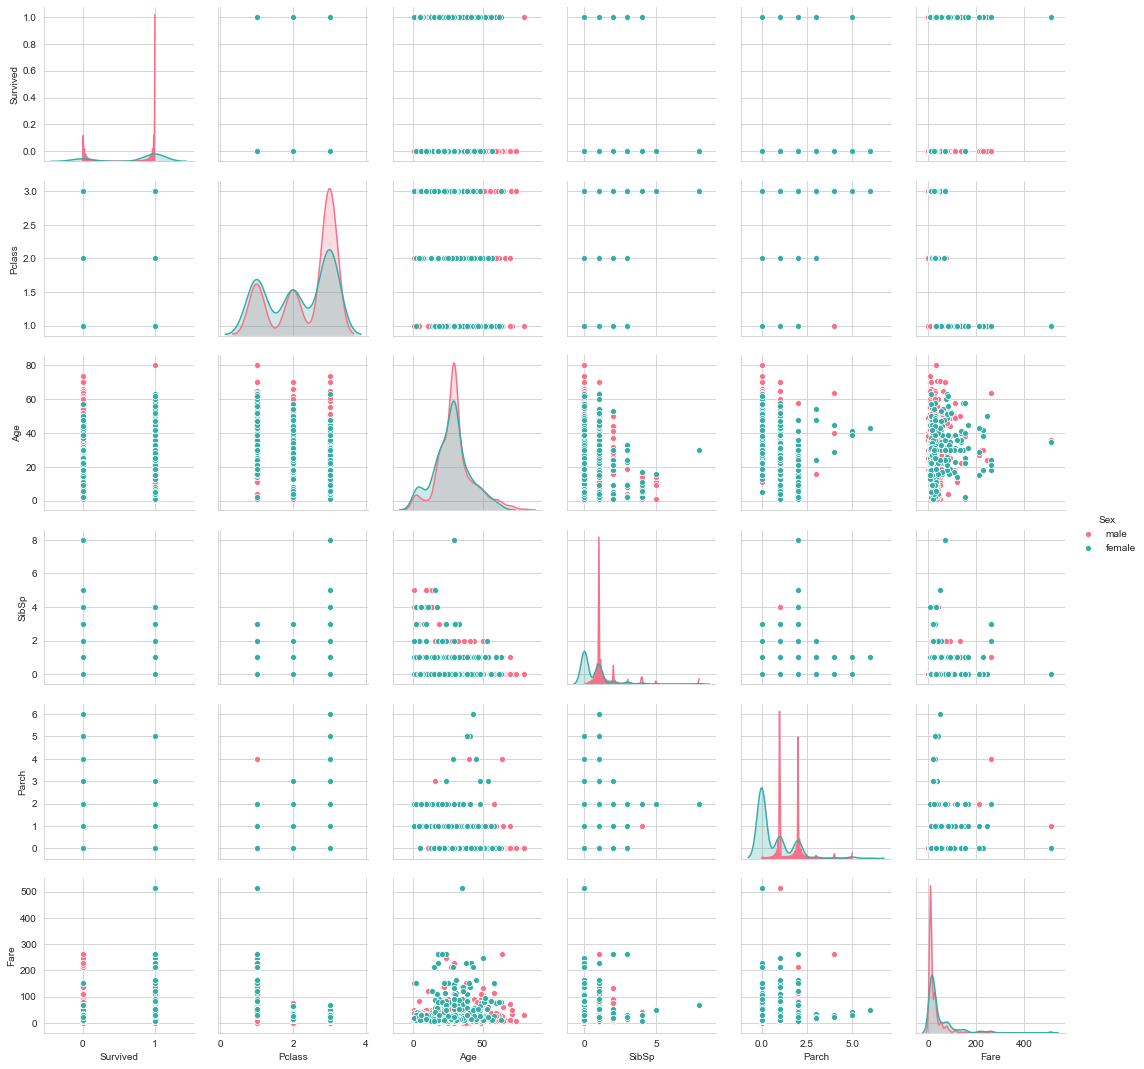

In [85]:
sns.pairplot(data,hue='Sex',palette='husl')

### SwarmPlot vs StripPlot
**Survived ~ Age**

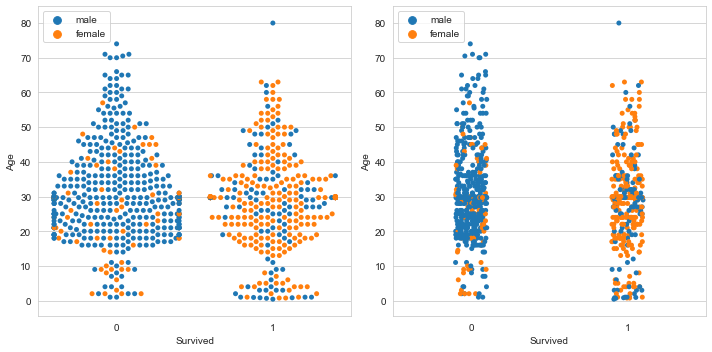

In [164]:
fig, ax = plt.subplots(1,2,figsize=(10,5))

sns.swarmplot(data['Survived'], data['Age'], hue = data['Sex'], ax = ax[0])
sns.stripplot(data['Survived'], data['Age'], hue = data['Sex'], ax = ax[1])

ax[0].legend(loc = 'upper left')
ax[1].legend(loc = 'upper left')

plt.tight_layout()

**Feature** : Age (figure out)

**Survived ~ SibSp**

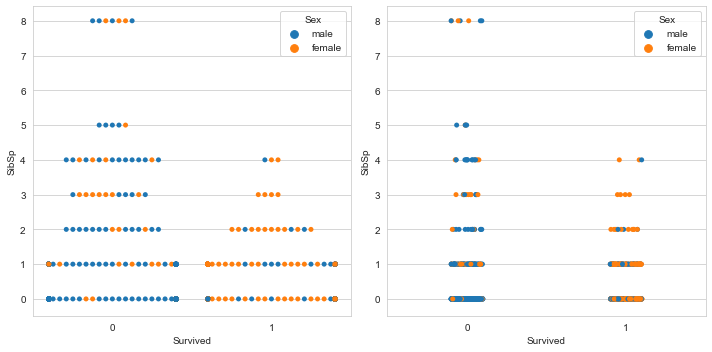

In [166]:
fig, ax = plt.subplots(1,2,figsize=(10,5))

sns.swarmplot(data['Survived'], data['SibSp'], hue = data['Sex'], ax = ax[0])
sns.stripplot(data['Survived'], data['SibSp'], hue = data['Sex'], ax = ax[1])

plt.tight_layout()

**Feature:** Is large family (SibSp>2 - 1, 0)

**Survived ~ Pclass** is not so informative

**Survived ~ Parch**

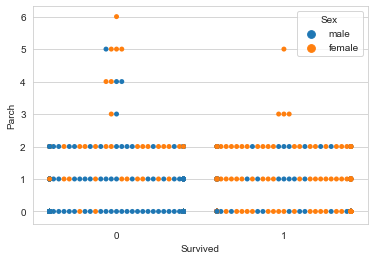

In [174]:
sns.swarmplot(data['Survived'],data['Parch'],hue=data['Sex']);

**Parch** might be useful

**Survivde ~ Fare**

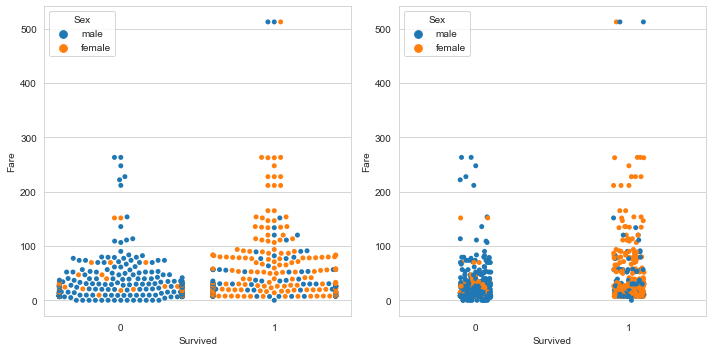

In [182]:
fig, ax = plt.subplots(1,2,figsize = (10,5))

sns.swarmplot(data['Survived'], data['Fare'], hue=data['Sex'], ax=ax[0])
sns.stripplot(data['Survived'], data['Fare'], hue=data['Sex'], ax=ax[1])


plt.tight_layout()

**Fare** is useful feature 

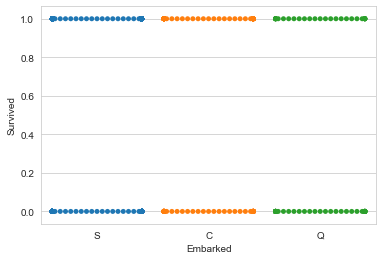

In [185]:
sns.swarmplot(data['Embarked'],data['Survived']);

Probably **Embarkation** is not useful feature

**Box Plot vs Violin Plot**

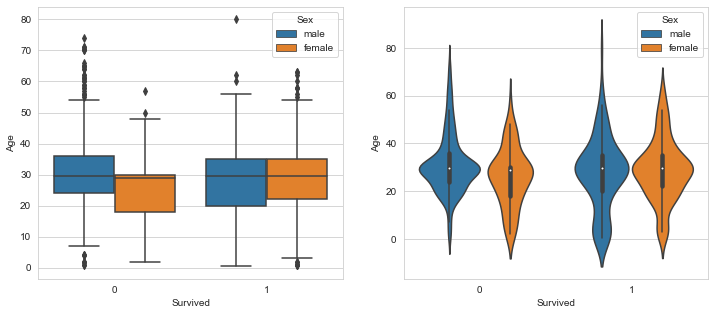

In [226]:
fig, ax = plt.subplots(1,2, figsize=(12,5))

sns.boxplot(data['Survived'],data['Age'],hue=data['Sex'],ax=ax[0])
sns.violinplot(data['Survived'],data['Age'],hue=data['Sex'],ax=ax[1])

plt.show()

In [206]:
print(data[data['Survived'] == 1].groupby('Sex').median())
print(data[data['Survived'] == 0].groupby('Sex').median())

        Survived  Pclass        Age  SibSp  Parch     Fare
Sex                                                       
female         1       2  29.699118      0      0  26.0000
male           1       2  29.699118      0      0  26.2875
        Survived  Pclass        Age  SibSp  Parch      Fare
Sex                                                        
female         0       3  29.000000      1      0  15.24580
male           0       3  29.699118      0      0   9.41665


In [224]:
women_more_30 = data[(data['Age'] >= 30) & (data['Sex'] == 'female')]['Sex'].count()
women_less_30 = data[(data['Age'] < 30) & (data['Sex'] == 'female')]['Sex'].count()

women_more_30_surv = data[(data['Age'] >= 30) & (data['Sex'] == 'female') & (data['Survived'] == 1)]['Sex'].count()
women_less_30_surv  = data[(data['Age'] < 30) & (data['Sex'] == 'female') & (data['Survived'] == 1)]['Sex'].count()

pct_1 = np.round(women_more_30_surv/women_more_30,2)
pct_2 = np.round(women_less_30_surv/women_less_30,2)

summary_women = pd.DataFrame({'Age':['30+','<30'],
                              'Number':[women_more_30, women_less_30],
                              'Survival_pct':[pct_1,pct_2]})
summary_women

,Age,Number,Survival_pct
0,30+,114,0.81
1,<30,200,0.70


**Feature:**  female_more_30 :if female age >= 30 you are likely to survive

**Survived ~ Fare**

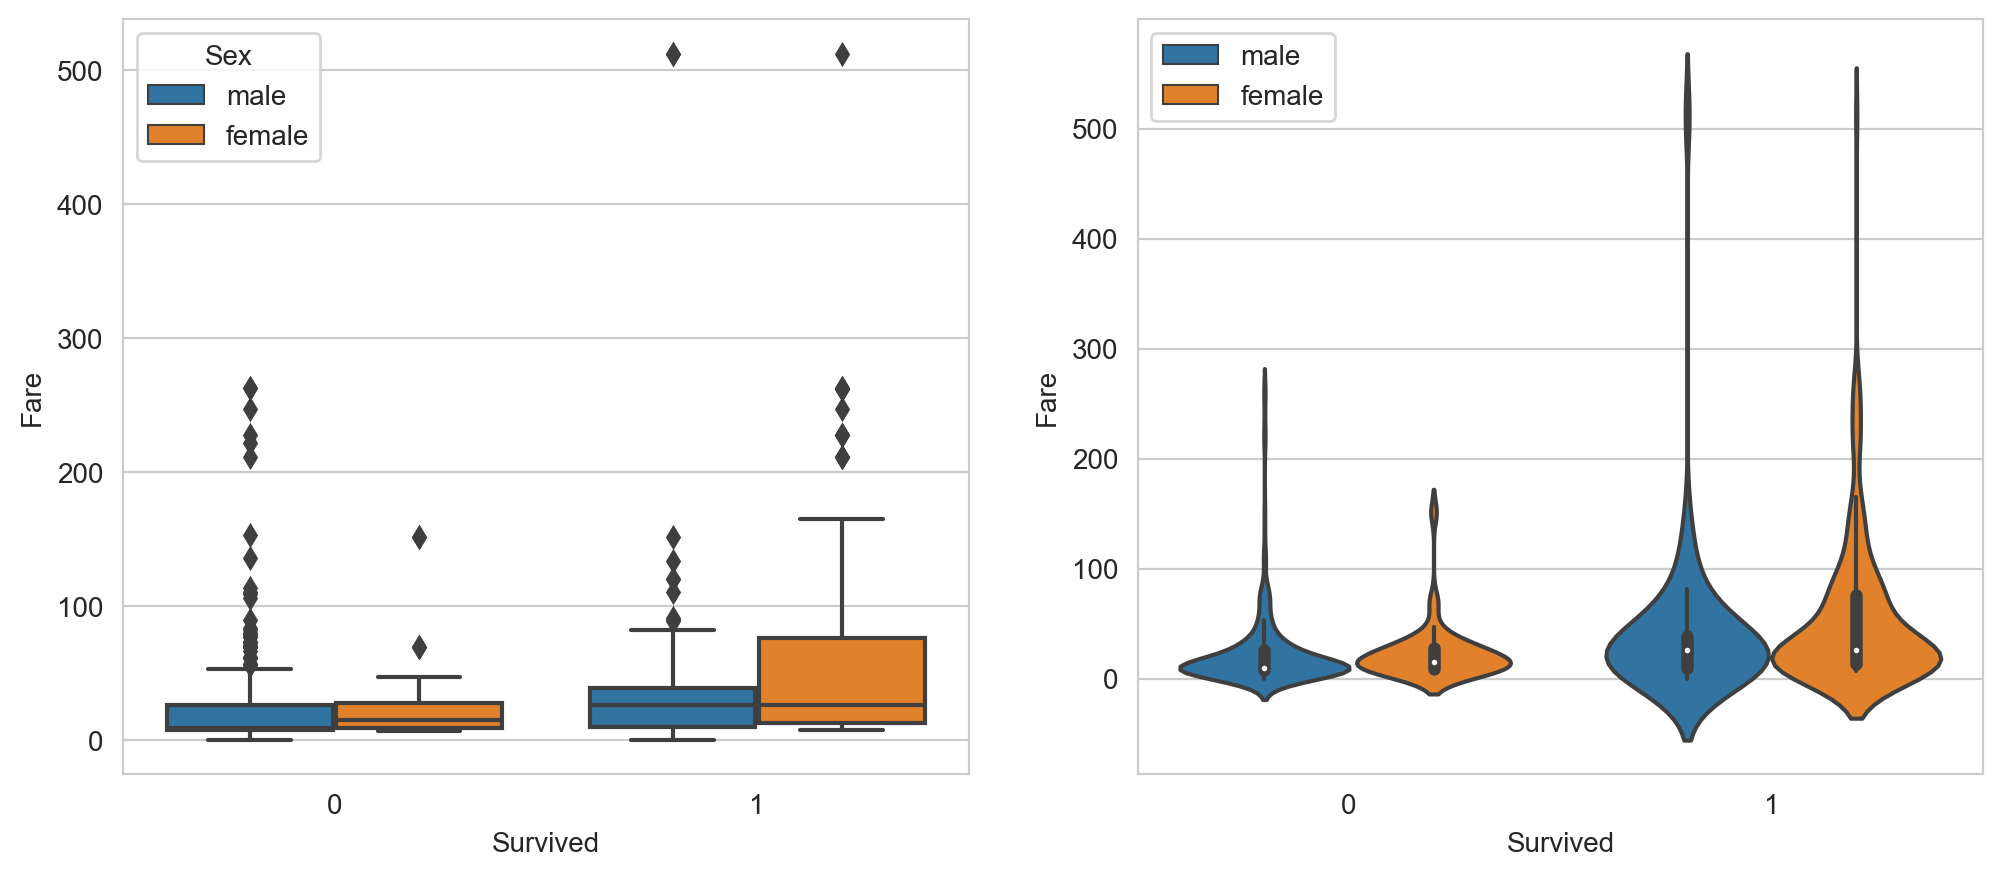

In [243]:
fig, ax = plt.subplots(1,2,figsize=(12,5),dpi=200)

sns.boxplot(data['Survived'],data['Fare'],hue = data['Sex'],ax=ax[0])
sns.violinplot(data['Survived'],data['Fare'],hue = data['Sex'],ax=ax[1])

ax[1].legend(loc = 'upper left')
plt.show()

### Barplot vs Countplot

**Survived ~ Pclass**

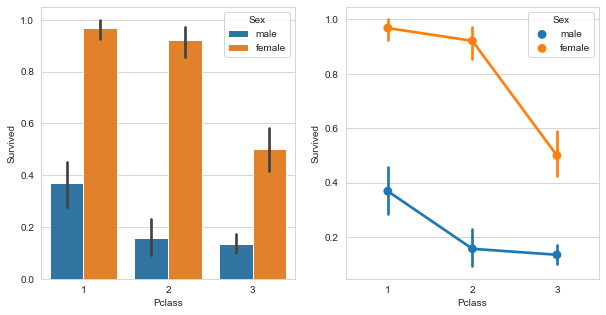

In [253]:
fig, ax = plt.subplots(1,2, figsize = (10,5))

sns.barplot(data['Pclass'],data['Survived'],ax=ax[0],hue=data['Sex'])
sns.pointplot(data['Pclass'],data['Survived'],ax=ax[1],hue=data['Sex'])

plt.show()

**Feature**: Class is useful. 

The higher the class the more chances to survive for both men and women.

**Survived ~ Sex**

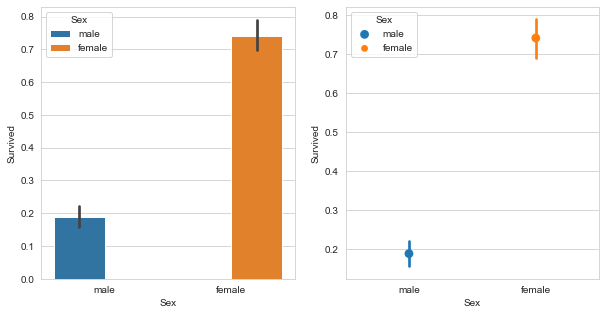

In [256]:
fig, ax = plt.subplots(1,2, figsize = (10,5))

sns.barplot(data['Sex'],data['Survived'],ax=ax[0],hue=data['Sex'])
sns.pointplot(data['Sex'],data['Survived'],ax=ax[1],hue=data['Sex'])

plt.show()

**Survived ~ Age**

Can't see anything need to cluster age

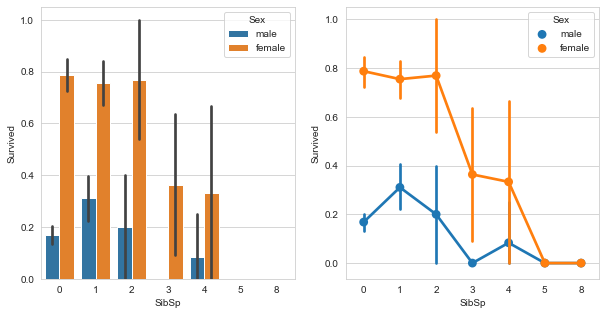

In [262]:
fig, ax = plt.subplots(1,2, figsize = (10,5))

sns.barplot(data['SibSp'],data['Survived'],ax=ax[0],hue=data['Sex'])
sns.pointplot(data['SibSp'],data['Survived'],ax=ax[1],hue=data['Sex'])

plt.show()

**Survived ~ Parch**

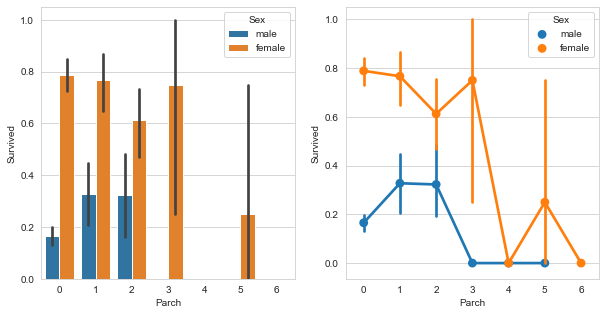

In [265]:
fig, ax = plt.subplots(1,2, figsize = (10,5))

sns.barplot(data['Parch'],data['Survived'],ax=ax[0],hue=data['Sex'])
sns.pointplot(data['Parch'],data['Survived'],ax=ax[1],hue=data['Sex'])

plt.show()

**Survived ~ Embarked**

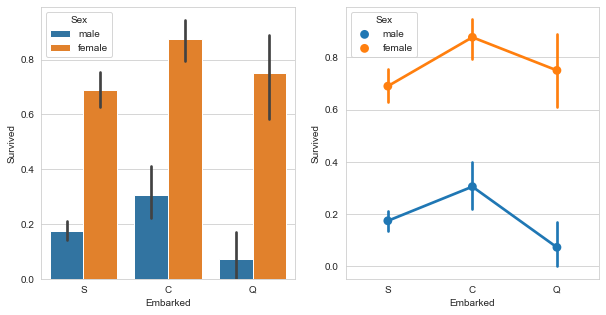

In [285]:
fig, ax = plt.subplots(1,2, figsize = (10,5))

sns.barplot(data['Embarked'],data['Survived'],ax=ax[0],hue = data['Sex'])
sns.pointplot(data['Embarked'],data['Survived'],ax=ax[1],hue = data['Sex'])

plt.show()

### Countplot

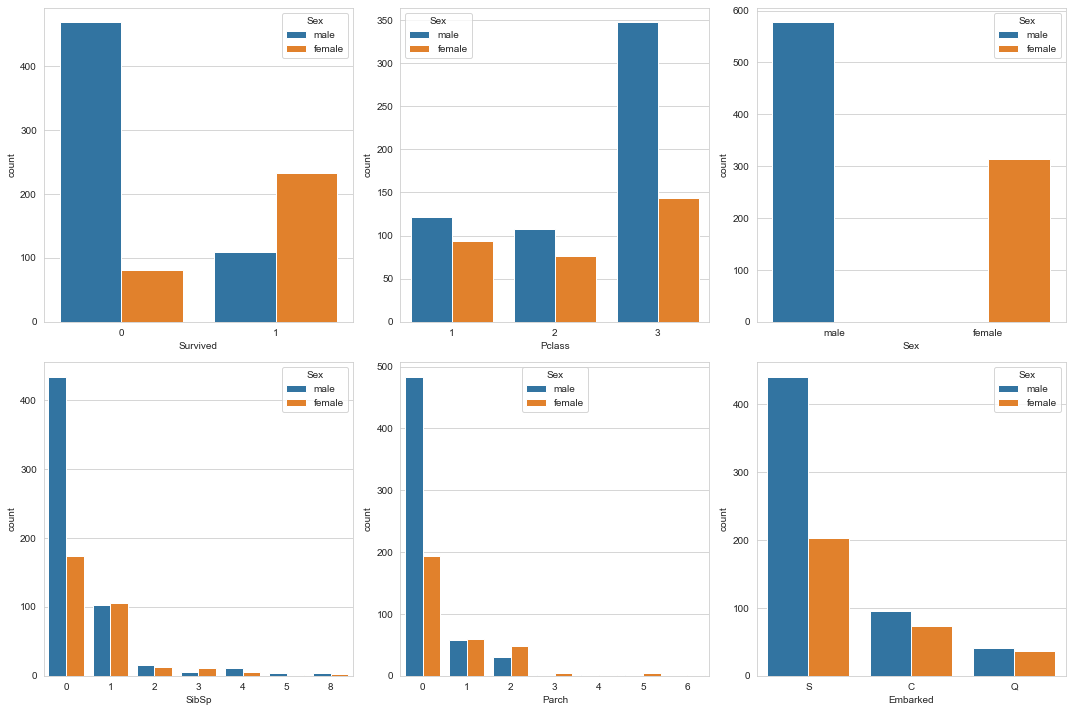

In [284]:
fig, ax = plt.subplots(2,3, figsize = (15,10))

sns.countplot(data['Survived'],hue=data['Sex'],ax=ax[0][0])
sns.countplot(data['Pclass'],hue=data['Sex'],ax=ax[0][1])
sns.countplot(data['Sex'],hue=data['Sex'],ax=ax[0][2])
sns.countplot(data['SibSp'],hue=data['Sex'],ax=ax[1][0])
sns.countplot(data['Parch'],hue=data['Sex'],ax=ax[1][1])
sns.countplot(data['Embarked'],hue=data['Sex'],ax=ax[1][2])

plt.tight_layout()

### Regplot

In [317]:
data['Embarked'].fillna( data['Embarked'].value_counts().index.values[0], inplace=True)

In [319]:
data.Embarked.isnull().sum()

0

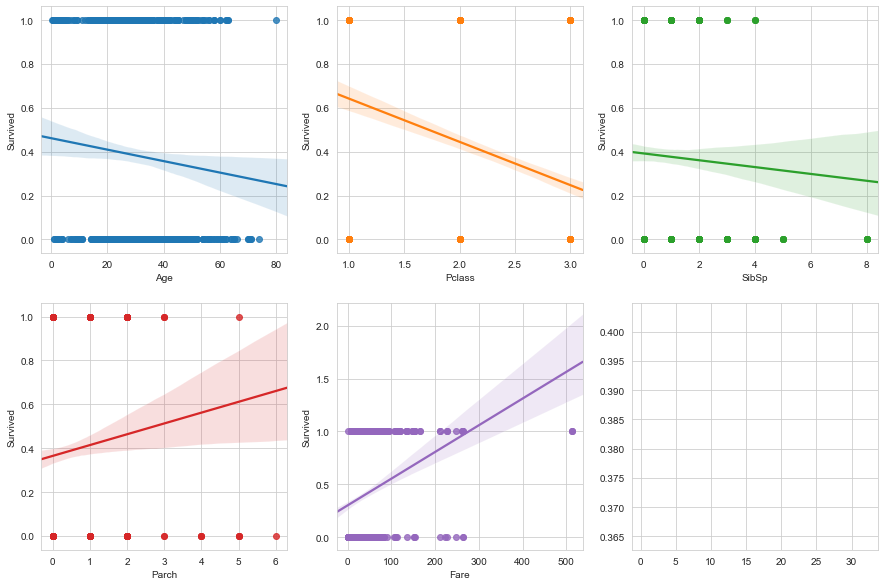

In [321]:
fig, ax = plt.subplots(2,3, figsize = (15,10))

sns.regplot(data['Age'],data['Survived'],ax=ax[0][0])
sns.regplot(data['Pclass'],data['Survived'],ax=ax[0][1])
sns.regplot(data['SibSp'],data['Survived'],ax=ax[0][2])
sns.regplot(data['Parch'],data['Survived'],ax=ax[1][0])
sns.regplot(data['Fare'],data['Survived'],ax=ax[1][1])
#sns.regplot(data['Embarked'],data['Survived'],ax=ax[1][2])


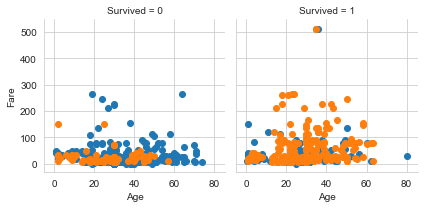

In [322]:
g = sns.FacetGrid(data,col='Survived',hue='Sex')
g.map(plt.scatter,'Age','Fare')

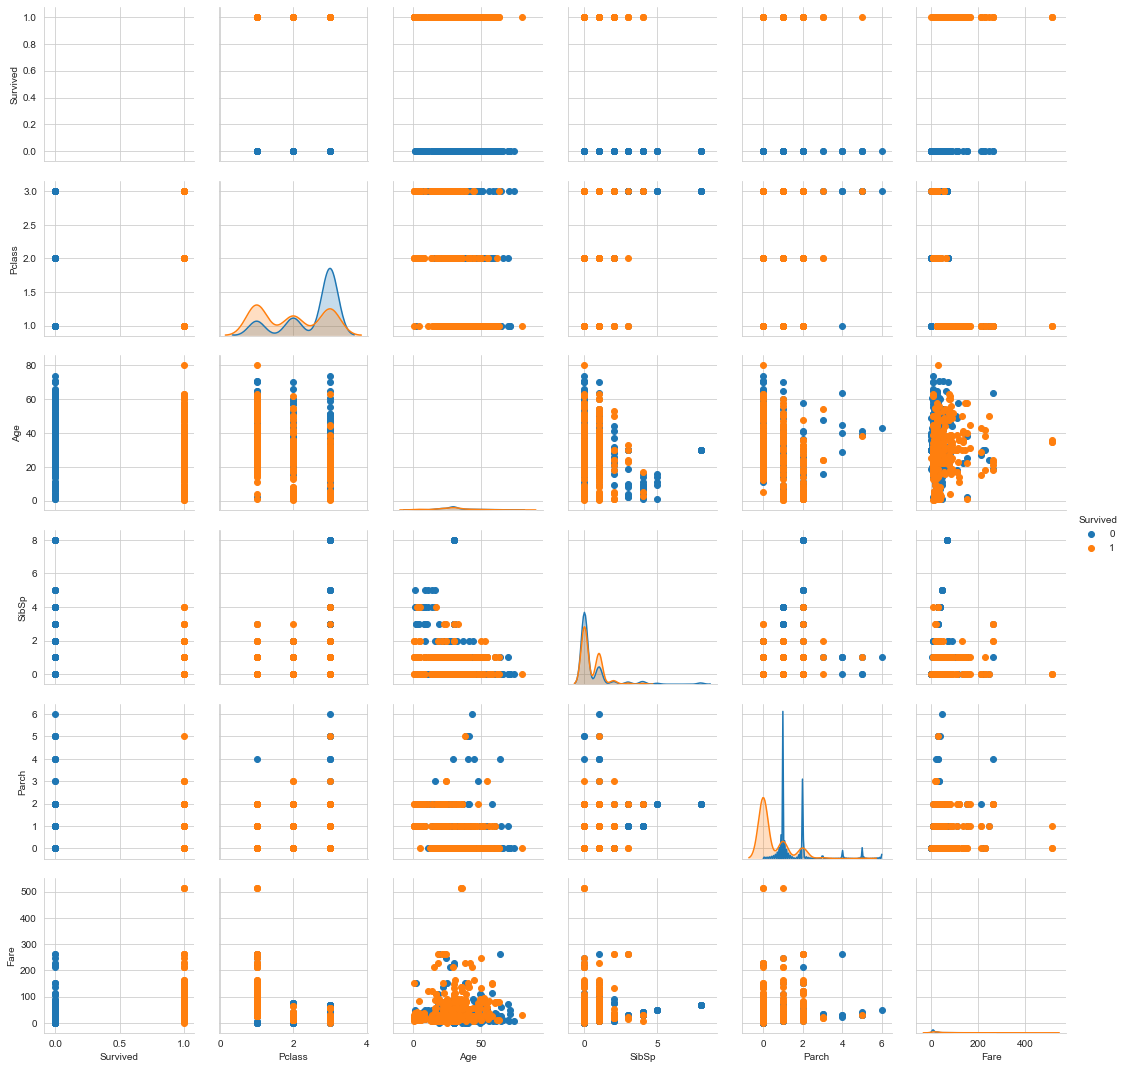

In [329]:
g = sns.PairGrid(data,hue='Survived')
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot,shade=True)
g.map_lower(plt.scatter)
g.add_legend()